# **Cibersegurança 2023/1 - Projeto de Programação 1**

### Classificador de SPAM 

#### **Aluno**: João Vitor Ferreira
#### **Matricula**: 2021039654

In [1]:
#Estudo de caso 5 do curso de Introduação à Ciência de Dados Aplicada à Cibersegurança

#Importando bibliotecas básicas

import numpy as np # vetores e matrizes 
import pandas as pd # processamento dos dados, arquivo CSV I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


# **Importando os Dados**

In [2]:
# Importando a base de dados para o pandas

sms = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding = "ISO-8859-1", usecols=[0,1], skiprows=1,
                  names=["label", "message"])
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
sms.label = sms.label.map({"ham":0, "spam":1})

In [4]:
# mais casos negativos (ham) que positivos (spams) 
sms.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

In [5]:
#Dividindo a base em treino e teste
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(sms.message, 
                                                                            sms.label, 
                                                                            test_size=0.2)

In [6]:
# Criando o documento de treino

from sklearn.feature_extraction.text import CountVectorizer

couvec = CountVectorizer()
couvec.fit(features_train)


CountVectorizer()

In [7]:
# número de características ou tokens
trained_features = couvec.get_feature_names()
print("Número de características vetorizadas:", len(trained_features))
print("Exemplos de características treinadas:", trained_features[1:10])

Número de características vetorizadas: 7617
Exemplos de características treinadas: ['000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02']


In [8]:
# tokenized train documents

dtm_train = couvec.fit_transform(features_train)
print("Shape of dtm_train:", dtm_train.shape)
print(dtm_train[0:2]) # first two rows of sparse matrix

Shape of dtm_train: (4457, 7617)
  (0, 3554)	1
  (0, 7566)	1
  (0, 3432)	1
  (0, 6714)	1
  (0, 1905)	1
  (0, 2420)	1
  (0, 7415)	1
  (0, 4412)	1
  (1, 2122)	1
  (1, 4176)	1
  (1, 4816)	1
  (1, 6704)	1
  (1, 4682)	1
  (1, 4728)	1
  (1, 4471)	1
  (1, 3001)	1
  (1, 4860)	1
  (1, 257)	1
  (1, 1108)	1
  (1, 6972)	1
  (1, 6969)	1
  (1, 7456)	1
  (1, 6335)	1
  (1, 6815)	1
  (1, 4718)	1
  (1, 645)	1
  (1, 3093)	1
  (1, 7573)	1
  (1, 4765)	1
  (1, 520)	1
  (1, 2098)	1
  (1, 6617)	1
  (1, 306)	1
  (1, 4553)	1


In [9]:
# tokenized test documents

dtm_test = couvec.transform(features_test)
print("Shape of dtm_test:", dtm_test.shape)

Shape of dtm_test: (1115, 7617)


# **Multimodal Naive Bayes - ORIGINAL**

In [10]:
# Construíndo e avaliando o modelo 

# Multimodal Naive Bayes 
# O classificador multimodal Naive Bays é útil para classificar características discretas. 
# (e.g., número de palavras para classificação de textos). 
# A distribuição multimodal requer geralmente contadores inteiros como features.

# Importando e instanciando o modelo Nayve Bayes Multimodal
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [11]:
# Treinando o modelo

nb.fit(dtm_train, labels_train)

MultinomialNB()

In [12]:
# Fazendo predições

labels_pred = nb.predict(dtm_test)

In [13]:
# Acurácia
from sklearn import metrics
nb_accuracy = metrics.accuracy_score(labels_test, labels_pred)
nb_accuracy

0.9820627802690582

In [14]:
# Criando a matrix de confusão para precisão e recall (essas são duas outrss métricas de avaliação) 
metrics.confusion_matrix(labels_test, labels_pred)

array([[960,   6],
       [ 14, 135]])

In [15]:
# Percentagem do total de spams detectados i.e.recall
print("Recall:", metrics.recall_score(labels_test, labels_pred))

nb_precision = metrics.precision_score(labels_test, labels_pred)

# Percentagem das predições positivas (spams) corretas, i.e. precisão
print("Precisão:", nb_precision)

Recall: 0.9060402684563759
Precisão: 0.9574468085106383


In [16]:
print("Ordem das classes no predict_proba:", nb.classes_)
print("Exemplos de probabilidades de classes:", nb.predict_proba(dtm_test)[0])


Ordem das classes no predict_proba: [0 1]
Exemplos de probabilidades de classes: [9.99998472e-01 1.52766005e-06]


In [17]:
# Uma vez que somente ~15% dos rótulos são positivos (spam), a curva precisão-recall é mais informativa que
# a curva ROC

labels_prob = nb.predict_proba(dtm_test)[:, 1]
precisions, recalls, thresholds = metrics.precision_recall_curve(labels_test, labels_prob)

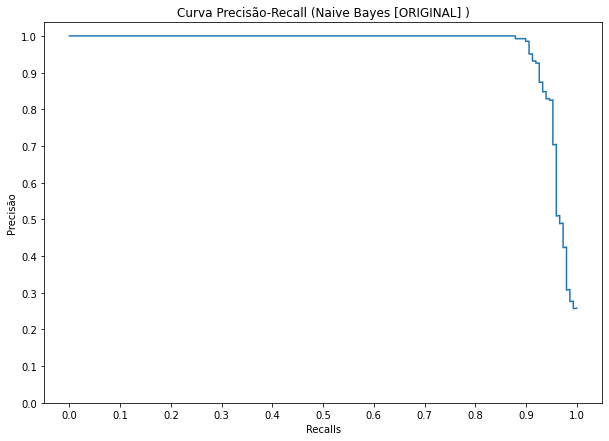

In [18]:
# Plotando a curva precisão-recall 

import matplotlib.pyplot as plt

# Plotando a curva precisão-recall
plt.figure(figsize=(10, 7))
plt.plot(recalls, precisions)
plt.xlabel("Recalls")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Precisão")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("Curva Precisão-Recall (Naive Bayes [ORIGINAL] )")
plt.show()


# **Aplicando o TFIDF e o Balancemento dos dados**

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(sms.message, 
                                                                            sms.label, 
                                                                            test_size=0.2)

In [20]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer

# Dados de texto e rótulos
texts = sms['message'].values
labels = sms['label'].values

# Aplicar undersampling
undersampler = RandomUnderSampler(random_state=42)
texts_resampled, labels_resampled = undersampler.fit_resample(texts.reshape(-1, 1), labels)

# Converter novamente para formato de array unidimensional
texts_resampled = texts_resampled.flatten()
labels_resampled = labels_resampled.flatten()

# Aplicar TF-IDF aos dados de texto resampleados
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts_resampled)

In [21]:
trained_features = tfidf_vectorizer.get_feature_names()
print("Número de características vetorizadas:", len(trained_features))
print("Exemplos de características treinadas:", trained_features[1:10])

Número de características vetorizadas: 4511
Exemplos de características treinadas: ['000', '008704050406', '0089', '0121', '01223585236', '01223585334', '02', '0207', '02072069400']


In [22]:
dtm_train = tfidf_vectorizer.fit_transform(features_train)
print("Shape of dtm_train:", dtm_train.shape)
print(dtm_train[0:2]) # first two rows of sparse matrix

Shape of dtm_train: (4457, 7687)
  (0, 2943)	0.14593152778083401
  (0, 2424)	0.3350185155567979
  (0, 6750)	0.1235441963047822
  (0, 3116)	0.1718783351137477
  (0, 6867)	0.1005356944755471
  (0, 6243)	0.32044966498831506
  (0, 4678)	0.20853494583919974
  (0, 1587)	0.20676836651448563
  (0, 6596)	0.32044966498831506
  (0, 4125)	0.18574535066038847
  (0, 956)	0.13504953932173958
  (0, 4588)	0.3164690058681743
  (0, 1115)	0.16875434223685293
  (0, 1194)	0.20962859281847648
  (0, 5545)	0.22531787620310925
  (0, 7640)	0.1039208106172553
  (0, 7415)	0.18640678945888137
  (0, 4362)	0.2831257503908611
  (0, 6723)	0.2047347552764402
  (0, 877)	0.27610083035833033
  (1, 93)	0.3334403325444688
  (1, 1605)	0.12702964957633442
  (1, 3657)	0.2648419030952684
  (1, 4540)	0.1881280839752986
  (1, 7473)	0.21597835372883578
  (1, 7046)	0.20322374787684233
  (1, 1878)	0.2125729536464156
  (1, 336)	0.3334403325444688
  (1, 7481)	0.14424702009802368
  (1, 5678)	0.31791689310387605
  (1, 2985)	0.16052998063

In [23]:
dtm_test = tfidf_vectorizer.transform(features_test)
print("Shape of dtm_test:", dtm_test.shape)

Shape of dtm_test: (1115, 7687)


# **Multimodal Naive Bayes - TFIDF**

In [24]:
# Construíndo e avaliando o modelo 

# Multimodal Naive Bayes 
# O classificador multimodal Naive Bays é útil para classificar características discretas. 
# (e.g., número de palavras para classificação de textos). 
# A distribuição multimodal requer geralmente contadores inteiros como features.

# Importando e instanciando o modelo Nayve Bayes Multimodal
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [25]:
# Treinando o modelo

nb.fit(dtm_train, labels_train)

MultinomialNB()

In [26]:
# Fazendo predições

nb_labels_pred = nb.predict(dtm_test)

In [27]:
# Acurácia
from sklearn import metrics
nb2_accuracy = metrics.accuracy_score(labels_test, nb_labels_pred)
nb2_accuracy

0.9623318385650225

In [28]:
# Criando a matrix de confusão para precisão e recall (essas são duas outrss métricas de avaliação) 
metrics.confusion_matrix(labels_test, nb_labels_pred)

array([[971,   0],
       [ 42, 102]])

In [29]:
# Percentagem do total de spams detectados i.e.recall
print("Recall:", metrics.recall_score(labels_test, nb_labels_pred))

nb2_precision = metrics.precision_score(labels_test, nb_labels_pred)

# Percentagem das predições positivas (spams) corretas, i.e. precisão
print("Precisão:", nb2_precision)

Recall: 0.7083333333333334
Precisão: 1.0


In [30]:
print("Ordem das classes no predict_proba:", nb.classes_)
print("Exemplos de probabilidades de classes:", nb.predict_proba(dtm_test)[0])


Ordem das classes no predict_proba: [0 1]
Exemplos de probabilidades de classes: [0.99739253 0.00260747]


In [31]:
# Uma vez que somente ~15% dos rótulos são positivos (spam), a curva precisão-recall é mais informativa que
# a curva ROC

nb_labels_prob = nb.predict_proba(dtm_test)[:, 1]
precisions, recalls, thresholds = metrics.precision_recall_curve(labels_test, nb_labels_prob)

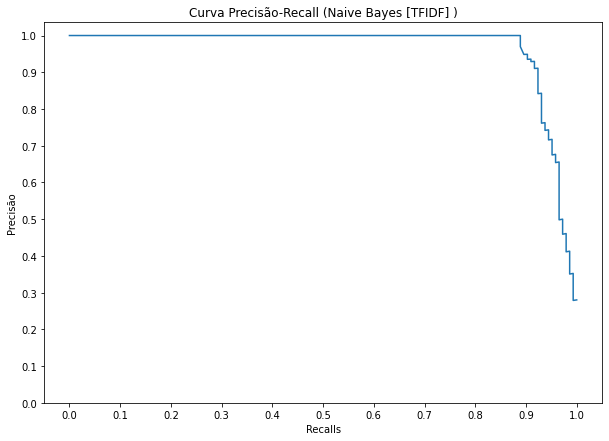

In [32]:
import matplotlib.pyplot as plt

# precisions, recalls, thresholds = metrics.precision_recall_curve(labels_test, nb_labels_prob)

# Plotando a curva precisão-recall
plt.figure(figsize=(10, 7))
plt.plot(recalls, precisions)
plt.xlabel("Recalls")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Precisão")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("Curva Precisão-Recall (Naive Bayes [TFIDF] )")
plt.show()


# **Random Forest**

In [33]:
# Importando e instanciando o modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)

In [34]:
# Treinando o modelo Random Forest
rf.fit(dtm_train, labels_train)

RandomForestClassifier(n_estimators=200)

In [35]:
# Fazendo predições com o modelo Random Forest
rf_labels_pred = rf.predict(dtm_test)

In [36]:
# Avaliando o modelo Random Forest
rf_accuracy = metrics.accuracy_score(labels_test, rf_labels_pred)
rf_precision = metrics.precision_score(labels_test, rf_labels_pred)

In [37]:
# Imprimindo as métricas do modelo Random Forest
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)

Random Forest Accuracy: 0.9730941704035875
Random Forest Precision: 1.0


In [38]:
# Obtendo as probabilidades das predições do modelo Random Forest
rf_labels_prob = rf.predict_proba(dtm_test)[:, 1]
rf_precisions, rf_recalls, rf_thresholds = metrics.precision_recall_curve(labels_test, rf_labels_prob)

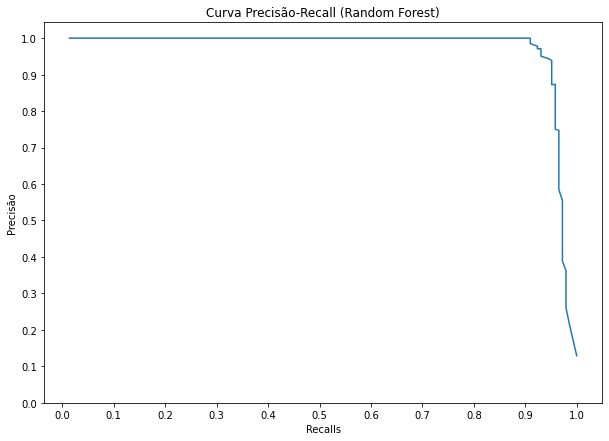

In [39]:
# Plotando a curva precisão-recall para o modelo Random Forest
plt.figure(figsize=(10, 7))
plt.plot(rf_recalls[:-1], rf_precisions[:-1])
plt.xlabel("Recalls")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Precisão")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("Curva Precisão-Recall (Random Forest)")
plt.show()

# **Support Vector Machines**


In [40]:
# Importando e instanciando o modelo Support Vector Machines
from sklearn.svm import SVC
svm = SVC()

In [41]:
# Treinando o modelo SVM
svm.fit(dtm_train, labels_train)

SVC()

In [42]:
# Fazendo predições para o modelo SVM
svm_labels_pred = svm.predict(dtm_test)

In [43]:
# Avaliando o modelo SVM
svm_accuracy = metrics.accuracy_score(labels_test, svm_labels_pred)
svm_precision = metrics.precision_score(labels_test, svm_labels_pred)

In [44]:
# Imprimindo as métricas do modelo SVM
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)

SVM Accuracy: 0.9820627802690582
SVM Precision: 0.9920634920634921


In [45]:
# Obtendo as probabilidades das predições do modelo SVM
svm_labels_prob = svm.decision_function(dtm_test)
svm_precisions, svm_recalls, svm_thresholds = metrics.precision_recall_curve(labels_test, svm_labels_prob)

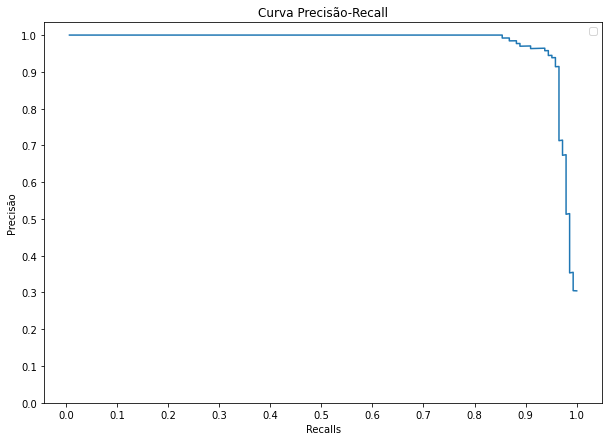

In [46]:
# Plotando a curva precisão-recall para o modelo SVM
plt.figure(figsize=(10, 7))
plt.plot(svm_recalls[:-1], svm_precisions[:-1])
plt.xlabel("Recalls")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Precisão")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("Curva Precisão-Recall")
plt.legend()
plt.show()

# **Multi-layer Perceptron Classifier**

In [47]:
# Importando e instanciando o modelo Multi-layer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

# Criando o modelo de Multi-layer Perceptron Classifier
nn = MLPClassifier(hidden_layer_sizes=(150, 100), max_iter=100)

In [48]:
# Treinando o modelo
nn.fit(dtm_train, labels_train)

MLPClassifier(hidden_layer_sizes=(150, 100), max_iter=100)

In [49]:
# Fazendo predições para o modelo de Multi-layer Perceptron Classifier
nn_labels_pred = nn.predict(dtm_test)

In [50]:
# Avaliando o modelo de Multi-layer Perceptron Classifier
nn_accuracy = metrics.accuracy_score(labels_test, nn_labels_pred)
nn_precision = metrics.precision_score(labels_test, nn_labels_pred)

In [51]:
# Imprimindo as métricas do modelo de Multi-layer Perceptron Classifier
print("Multi-layer Perceptron Classifier:", nn_accuracy)
print("Multi-layer Perceptron Classifier:", nn_precision)

Multi-layer Perceptron Classifier: 0.9829596412556054
Multi-layer Perceptron Classifier: 0.9770992366412213


In [52]:
# Obtendo as probabilidades das predições do modelo de Multi-layer Perceptron Classifier
nn_labels_prob = nn.predict_proba(dtm_test)[:, 1]
nn_precisions, nn_recalls, nn_thresholds = metrics.precision_recall_curve(labels_test, nn_labels_prob)

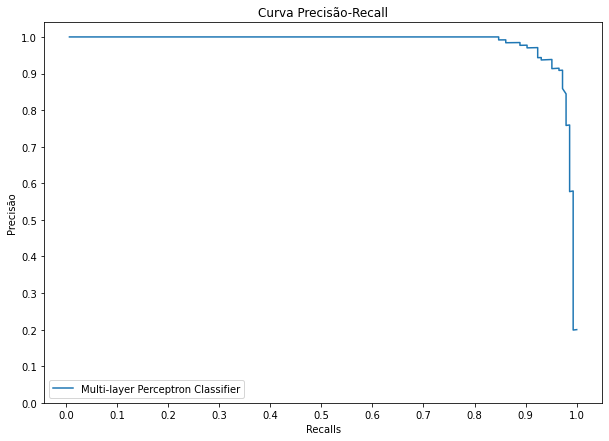

In [53]:
# Plotando a curva precisão-recall para o modelo de Multi-layer Perceptron Classifier
plt.figure(figsize=(10, 7))
plt.plot(nn_recalls[:-1], nn_precisions[:-1], label='Multi-layer Perceptron Classifier')
plt.xlabel("Recalls")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Precisão")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("Curva Precisão-Recall")
plt.legend()
plt.show()

# **Comparação dos metodos**

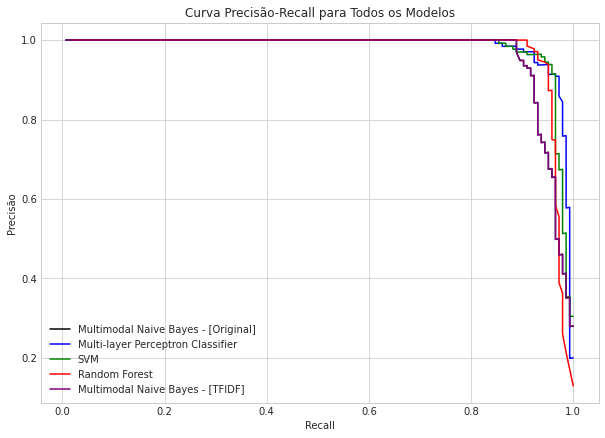

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

# Definindo as cores para cada modelo
colors = ['black','blue', 'green', 'red', 'purple']

# Definindo o estilo dos gráficos
plt.style.use('seaborn-whitegrid')

# Avaliando os modelos e armazenando as métricas
model_names = ['Multimodal Naive Bayes - [Original]', 'Multi-layer Perceptron Classifier', 'SVM', 'Random Forest', 'Multimodal Naive Bayes - [TFIDF]']
models = [nb_labels_prob, nn_labels_prob, svm_labels_prob, rf_labels_prob, nb_labels_prob]

# Plotando as curvas precisão-recall para todos os modelos juntos
plt.figure(figsize=(10, 7))
for i in range(len(model_names)):
    precision, recall, _ = metrics.precision_recall_curve(labels_test, models[i])
    plt.plot(recall[:-1], precision[:-1], label=model_names[i], color=colors[i])

plt.xlabel("Recall")
plt.ylabel("Precisão")
plt.title("Curva Precisão-Recall para Todos os Modelos")
plt.legend()
plt.show()


In [55]:
import pandas as pd
from sklearn import metrics

data = [
    {'Acurácia': nb_accuracy,'Precisão': nb_precision, 'Recall': metrics.recall_score(labels_test, labels_pred)},
    {'Acurácia': nb2_accuracy,'Precisão': nb2_precision, 'Recall': metrics.recall_score(labels_test, nb_labels_pred)},
    {'Acurácia': rf_accuracy, 'Precisão': rf_precision, 'Recall': metrics.recall_score(labels_test, svm_labels_pred)},
    {'Acurácia': svm_accuracy, 'Precisão': svm_precision, 'Recall': metrics.recall_score(labels_test, rf_labels_pred)},
    {'Acurácia': nn_accuracy, 'Precisão': nn_precision, 'Recall': metrics.recall_score(labels_test, nn_labels_pred)}
]

model_names = ['Multimodal Naive Bayes [Original]', 'Multimodal Naive Bayes [TFIDF]', 'Random Forest', 'Support Vector Machines', 'Multi-layer Perceptron Classifier']


# Criação do DataFrame
df = pd.DataFrame(data, index=model_names)

# Estilização do DataFrame
styled_df = (
    df.style
    .set_properties(**{'border-color': 'black', 'border-style': 'solid', 'border-width': '1px'})
    .set_table_styles([{'selector': 'th', 'props': [('font-weight', 'bold'), ('background-color', '#f2f2f2')]}])
    .set_table_attributes('style="margin-left: auto; margin-right: auto; border-collapse: collapse; border: 1px solid black;"')
)

# Exibição do DataFrame estilizado
styled_df

,Acurácia,Precisão,Recall
Multimodal Naive Bayes [Original],0.982063,0.957447,0.138889
Multimodal Naive Bayes [TFIDF],0.962332,1.000000,0.708333
Random Forest,0.973094,1.000000,0.868056
Support Vector Machines,0.982063,0.992063,0.791667
Multi-layer Perceptron Classifier,0.982960,0.977099,0.888889


In [56]:
# Encontrar a Modelo com a maior acurácia
maior_acuracia = df['Acurácia'].idxmax()

# Encontrar a Modelo com a maior precisão
maior_precisao = df['Precisão'].idxmax()

# Encontrar a Modelo com o maior recall
maior_recall = df['Recall'].idxmax()

# Encontrar o modelo com o melhor resultado em geral (média das métricas)
df['Média'] = df.mean(axis=1)
melhor_resultado_geral = df['Média'].idxmax()

# Imprimir os resultados
print(f'Modelo com maior acurácia: {maior_acuracia}')
print(f'Modelo com maior precisão: {maior_precisao}')
print(f'Modelo com maior recall: {maior_recall}')
print(f'Modelo com melhor resultado em geral: {melhor_resultado_geral}')


Modelo com maior acurácia: Multi-layer Perceptron Classifier
Modelo com maior precisão: Multimodal Naive Bayes [TFIDF]
Modelo com maior recall: Multi-layer Perceptron Classifier
Modelo com melhor resultado em geral: Multi-layer Perceptron Classifier


# **Resultados**


Neste trabalho, foi proposto que se apresentasse uma forma de melhorar a classificação dos dados propostos nesta base de dados. Como inicialmente já havia um resultado extremamente robusto, tendo uma acurácia já superior a 98%, encontrar formas de aumentar este resultado é estatisticamente complexo. Pois a forma em que os dados estão sendo categorizados, através da contagem da repetição das palavras e aplicação do Multimodal Naive Bayes, já permite que se possa encontrar um resultado significativamente satisfatório. Mas optei por alterar essa abordagem a fim de realizar testes para tentar encontrar formas de se obter resultados melhores.

Para isso, optei por aplicar o TF-IDF como a nova forma de classificação e uso no treino do algoritmo. E reteste usando o Multimodal Naive Bayes. No entanto, pude notar que houve melhorias na precisão e recalls, mas a acurácia diminuiu. Portanto, selecionei 3 outros algoritmos que acreditei que poderiam gerar resultados melhores. Eles foram o Multi-layer Perceptron Classifier, Random Forest e Support Vector Machines. Para que eles possam ser comparados com o Naive Bayes, quanto se eles obtiveram resultados melhores.

Pôde ser observado que a eficiência de todos esses algoritmos é excelente. Porém, vale destacar que o Multi-layer Perceptron Classifier foi o que apresentou os melhores valores em média, sendo o melhor em acurácia e recall, e chegando bem próximo dos valores de precisão do melhor algoritmo, perdendo por valores matematicamente desprezíveis, para a implementação original do Multimodal Naive Bayes.